In [1]:
pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.9 MB/s eta 0:00:00


In [2]:
pip install tensorflow

In [3]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

# Data Preprocessing

In [5]:
df = pd.read_csv('/content/Parkinson.csv')

In [6]:
df.head(30)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [7]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [8]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [9]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df.drop(['name'], axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler
features = df.drop('status', axis=1).select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale these features
df[features] = scaler.fit_transform(df[features])

# Check the transformed data
print(df.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0     0.184308      0.112592      0.054815        0.195680          0.249012   
1     0.198327      0.094930      0.278323        0.254130          0.288538   
2     0.165039      0.059128      0.265288        0.280178          0.328063   
3     0.165004      0.072927      0.264200        0.263342          0.328063   
4     0.161150      0.080909      0.260107        0.354511          0.407115   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.145472  0.247588    0.145288      0.312215          0.280197  ...   
1  0.191233  0.323687    0.191042      0.472887          0.444536  ...   
2  0.229287  0.369239    0.229411      0.390634          0.326212  ...   
3  0.209056  0.324759    0.208862      0.414278          0.354971  ...   
4  0.282755  0.437299    0.282870      0.499452          0.410025  ...   

   Shimmer:DDA       NHR       HNR  status      RPDE       DFA   spread1  

# EDA

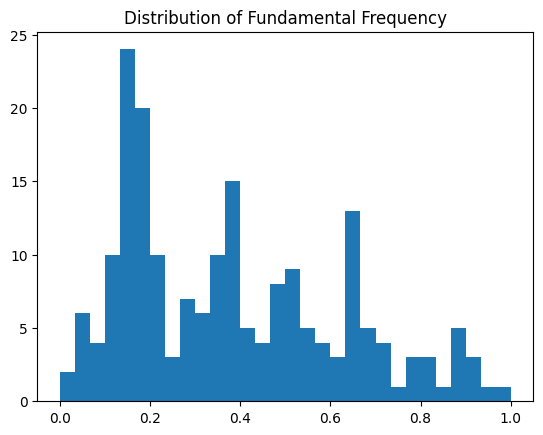

In [12]:
plt.hist(df['MDVP:Fo(Hz)'], bins=30)
plt.title('Distribution of Fundamental Frequency')
plt.show()

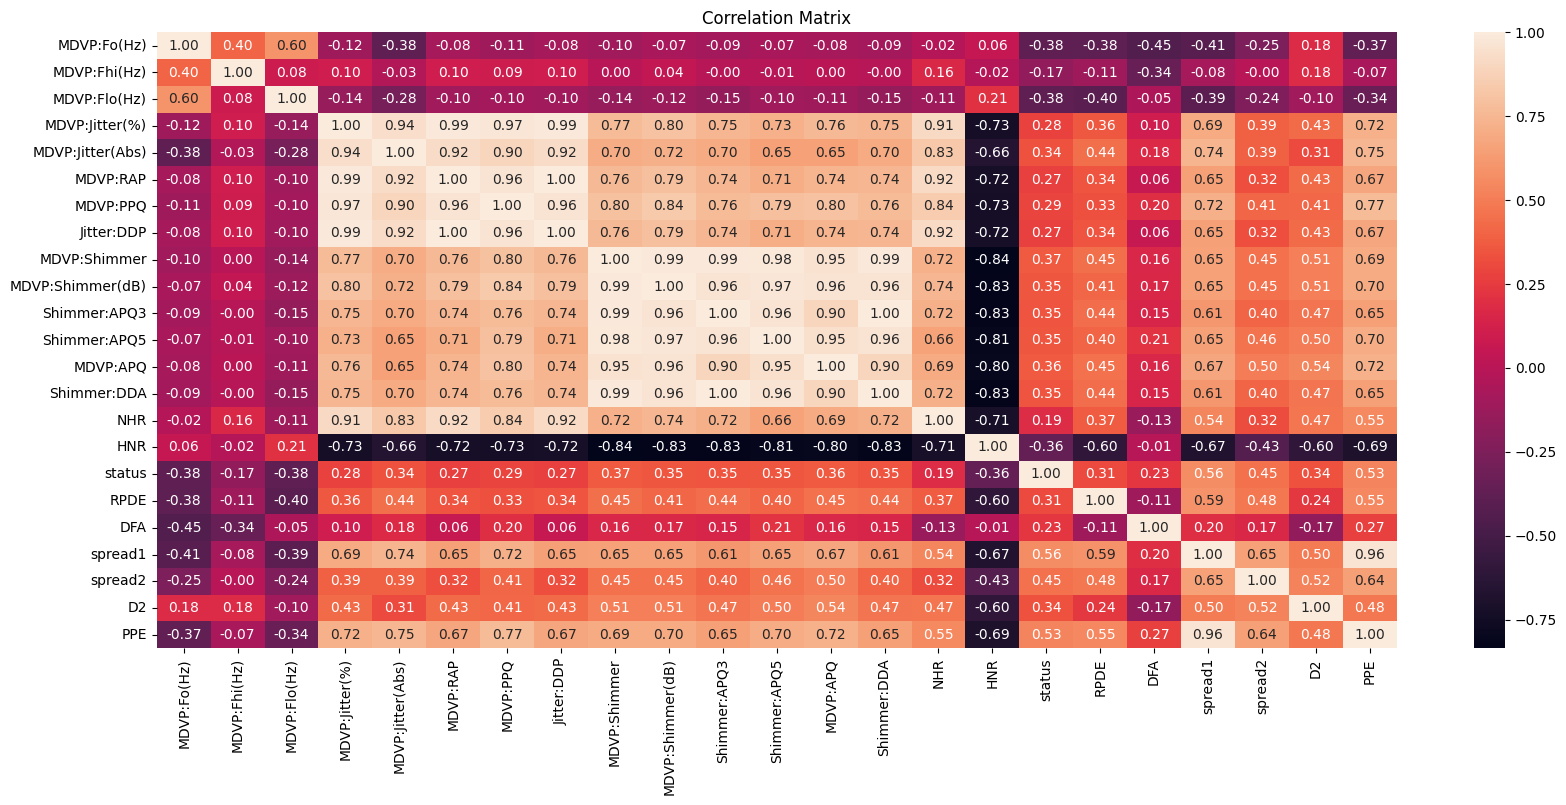

In [13]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Random Forest

In [16]:
print(features.shape)  # This should print (n_samples, n_features)
labels = df['status']
print(labels.shape)    # This should print (n_samples,)


(22,)
(195,)


In [17]:
from sklearn.model_selection import train_test_split

features = df.drop('status', axis=1)  # Correct way to drop the target column and retain all other features
labels = df['status']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Proceed with your RandomForest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9487179487179487
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



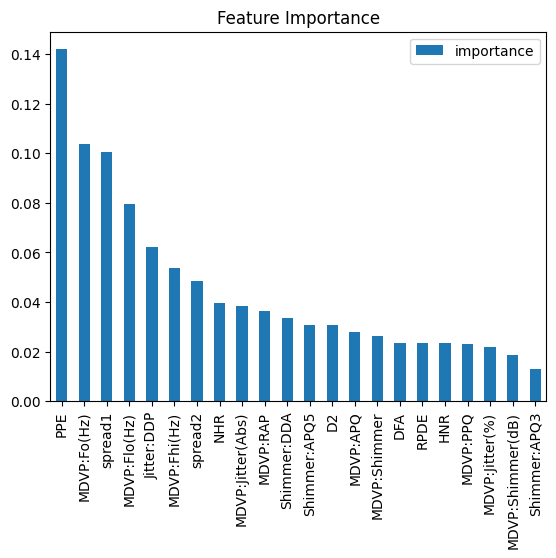

In [18]:
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = features.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


In [19]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

/* HP tuning*/

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                 max_features=max_features, random_state=42)
    clf.fit(X_train, y_train)
    return accuracy_score(y_test, clf.predict(X_test))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2024-04-16 18:37:12,796] A new study created in memory with name: no-name-44110469-933f-4509-8a32-821b926cd68b
[I 2024-04-16 18:37:13,231] Trial 0 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 242, 'max_depth': 43, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-04-16 18:37:13,546] Trial 1 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 185, 'max_depth': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-04-16 18:37:14,044] Trial 2 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 294, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.9487179487179487.
[I 2024-04-16 18:37:14,537] Trial 3 finished with value: 0.9487179487179487 and parameters: {'n_estimators': 302, 'max_depth': 34, 

Best parameters: {'n_estimators': 242, 'max_depth': 43, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best accuracy: 0.9487179487179487


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, features, labels, cv=20)
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())


Cross-validated scores: [0.9        1.         1.         0.9        0.9        1.
 0.9        1.         0.9        1.         1.         0.7
 0.9        0.8        0.7        0.88888889 0.77777778 0.88888889
 0.88888889 0.88888889]
Average score: 0.8966666666666667


In [23]:
/* Logistic Regression */

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Example binary data
np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple classification boundary

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict probabilities for class 1
y_pred_probs = clf.predict_proba(X_test)[:, 1]

# Calculating MSE between observed class labels and predicted probabilities
mse = mean_squared_error(y_test, y_pred_probs)
print("Mean Squared Error for Classification:", mse)

Mean Squared Error for Classification: 0.12646469413307054


# Reguralization

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate some classification data
X, y = make_classification(n_samples=100, n_features=22, n_redundant=0, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression object with L1 penalty
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Train the model
logistic_l1.fit(X_train, y_train)

# Coefficients
print("Coefficients with L1:", logistic_l1.coef_)


Coefficients with L1: [[ 0.          0.          0.          0.          0.         -0.77110911
   0.          0.          0.          0.          0.          0.
   4.29411476  0.          0.33944571  0.          0.6949152  -0.16708563
   0.          0.          0.         -0.15227381]]


In [25]:
# Check the shape of the coefficients
print(logistic_l1.coef_.shape)


(1, 22)


Number of features: 22
Number of coefficients: 22


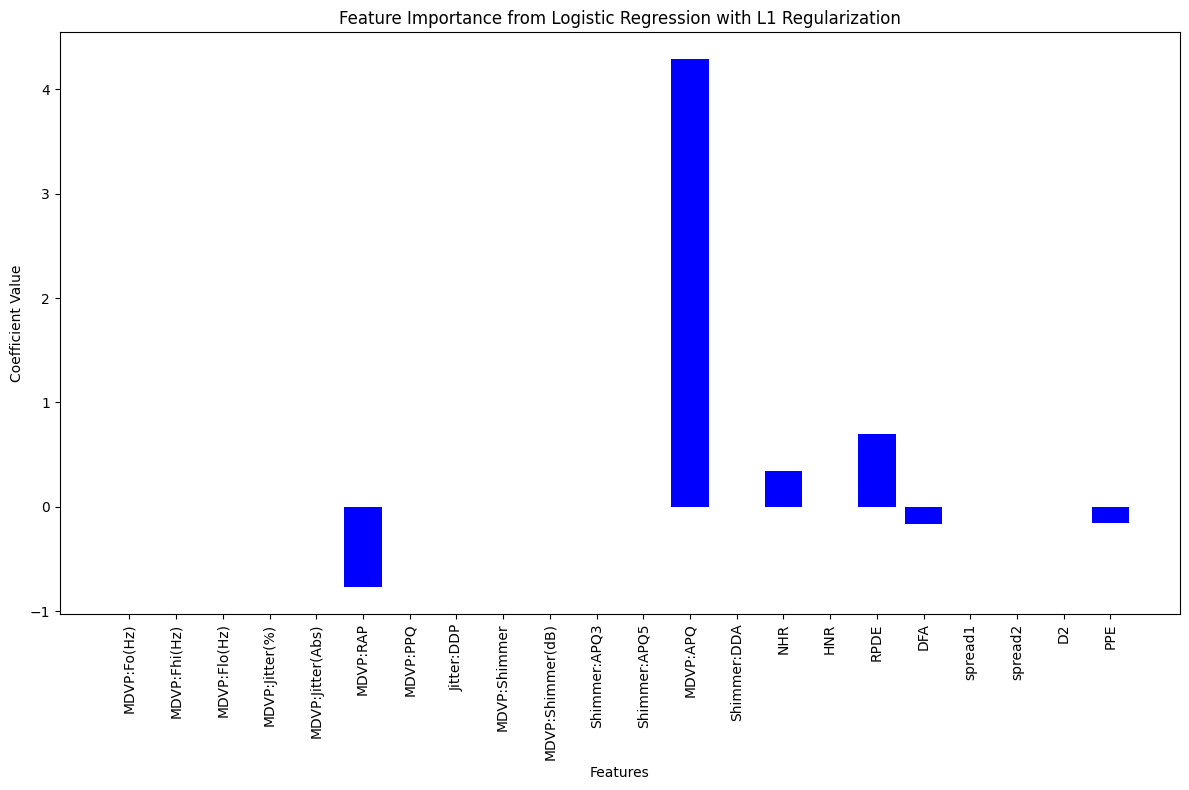

In [26]:
coefficients = logistic_l1.coef_[0]  # This makes 'coefficients' a simple 1D array of shape (22,)

# Ensure the shapes match up for plotting
print("Number of features:", len(features.columns))  # Should be 22
print("Number of coefficients:", len(coefficients))  # Should also be 22

# Creating a bar plot for the coefficients
plt.figure(figsize=(12, 8))  # Adjusting figure size for better visibility
plt.bar(features.columns, coefficients, color='b')
plt.xlabel('Features')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression with L1 Regularization')
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

# GAN

In [27]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.332584,0.068307,0.511745,1,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.516048,0.059331,0.432577,1,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.443317,0.039596,0.496220,1,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.475478,0.040997,0.495936,1,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.584542,0.054174,0.455499,1,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam


X_train = scaler.fit_transform(features)

# Define the generator
def build_generator(latent_dim, output_dim):
    model = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(256),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(output_dim, activation='sigmoid')  # Sigmoid activation to match [0, 1] range
    ])
    return model

# Define the discriminator
def build_discriminator(input_dim):
    model = Sequential([
        Dense(512, input_dim=input_dim),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
    return model

# Compile the GAN
def compile_gan(generator, discriminator):
    discriminator.trainable = False  # Ensure the discriminator's parameters are fixed during generator training
    gan = Sequential([generator, discriminator])
    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return gan

# Training the GAN
def train_gan(gan, generator, discriminator, features, epochs=10000, batch_size=32, latent_dim=100):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    for epoch in range(epochs):
        # Get random real data
        idx = np.random.randint(0, features.shape[0], batch_size)
        real_data = features[idx]

        # Generate fake data
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_data = generator.predict(noise)

        # Train discriminator
        d_loss_real = discriminator.train_on_batch(real_data, valid)
        d_loss_fake = discriminator.train_on_batch(gen_data, fake)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, valid)

        # Logging progress
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} / {epochs} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}] [G loss: {g_loss}]")

latent_dim = 100
output_dim = X_train.shape[1]
generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(output_dim)
gan = compile_gan(generator, discriminator)

train_gan(gan, generator, discriminator, X_train, epochs=5000, batch_size=32)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
Epoch: 1000 / 5000 [D loss: [0.68876323 0.578125  ]] [G loss: 0.6963582038879395]
1/1 [==============================] - 0s 33ms/step
Epoch: 2000 / 5000 [D loss: [0.68367827 0.546875  ]] [G loss: 0.7142032384872437]
1/1 [==============================] - 0s 25ms/step
Epoch: 3000 / 5000 [D loss: [0.68613574 0.578125  ]] [G loss: 0.7088220119476318]
1/1 [==============================] - 0s 21ms/step
Epoch: 4000 / 5000 [D loss: [0.68250257 0.6875    ]] [G loss: 0.7354976534843445]
1/1 [==============================] - 0s 21ms/step


In [42]:
generator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
# Generate new data
noise = np.random.normal(0, 1, (100, latent_dim))  # Generate 100 synthetic samples
generated_data = generator.predict(noise)

# Convert generated data back to original scale (if necessary)
generated_data_rescaled = scaler.inverse_transform(generated_data)

# Summary statistics of the generated data
print("Summary Statistics of Generated Data:")
print(pd.DataFrame(generated_data_rescaled, columns=features.columns).describe())


4/4 [==============================] - 0s 4ms/step
Summary Statistics of Generated Data:
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   100.000000    100.000000    100.000000      100.000000   
mean      0.358303      0.168997      0.271716        0.176163   
std       0.222840      0.125580      0.234253        0.163466   
min       0.067164      0.021474      0.022475        0.012482   
25%       0.171334      0.068236      0.114858        0.072649   
50%       0.327495      0.129951      0.202347        0.143257   
75%       0.500897      0.252660      0.322488        0.212352   
max       0.909182      0.556293      0.957904        0.894941   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        100.000000  100.000000  100.000000  100.000000    100.000000   
mean           0.171921    0.161138    0.168270    0.158521      0.237849   
std            0.128049    0.152048    0.161667    0.145144      0.187640   
min     

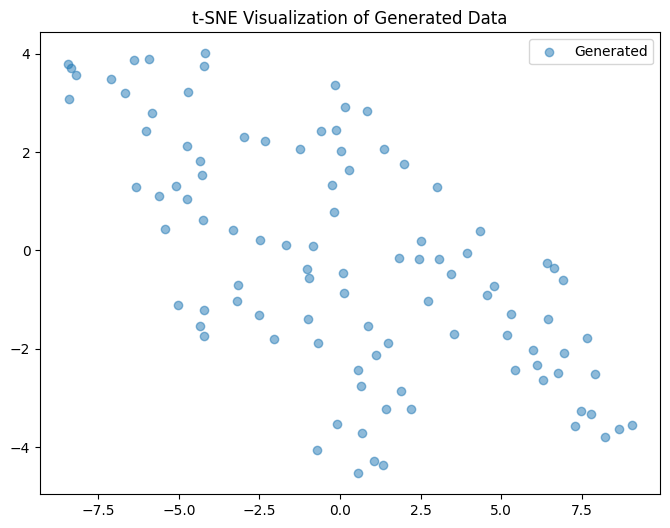

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(generated_data_rescaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, label='Generated')
plt.legend()
plt.title('t-SNE Visualization of Generated Data')
plt.show()


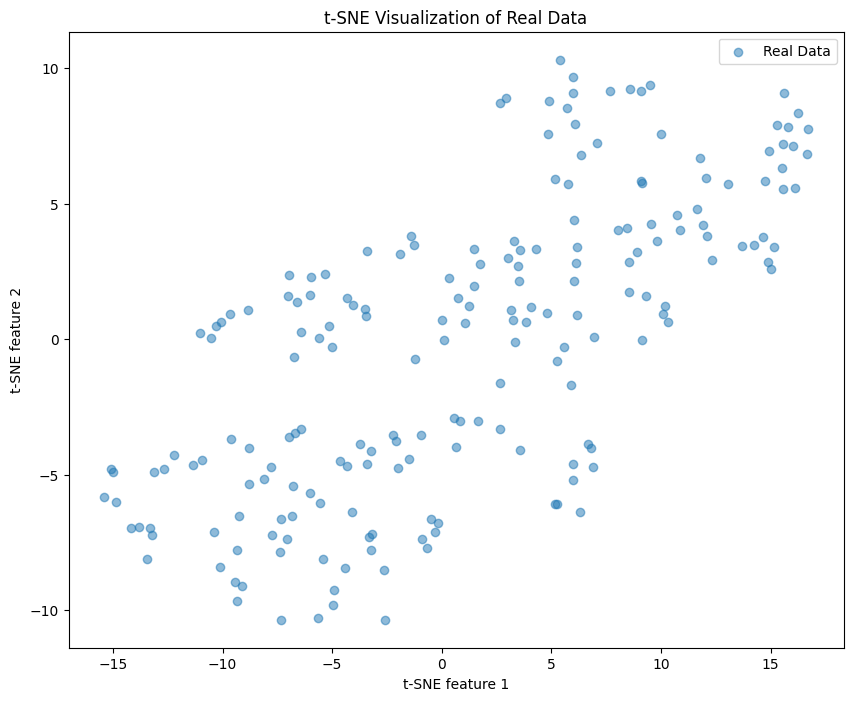

In [41]:
# Assuming `X_train` is your preprocessed real dataset ready for t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Now, let's plot the t-SNE transformed features of the real data
plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.5, label='Real Data')
plt.legend()
plt.title('t-SNE Visualization of Real Data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


In [38]:
def train_gan(generator, discriminator, gan, features, epochs=10000, batch_size=32, latent_dim=100):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    for epoch in range(epochs):
        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random batch of real data
        idx = np.random.randint(0, features.shape[0], batch_size)
        real_data = features[idx]

        # Generate a batch of new fake data
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_data = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_data, valid)
        d_loss_fake = discriminator.train_on_batch(gen_data, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        # We want the generator to trick the discriminator, so we label the generated samples as valid (1)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, valid)

        # Print the progress
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [D acc.: {100*d_loss[1]}%] [G loss: {g_loss}]")

    return d_loss, g_loss
